In [1]:
import main
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import lasagne
import theano
import theano.tensor as T

Using gpu device 0: GeForce GTX TITAN X (CNMeM is disabled, CuDNN 4007)


In [2]:
import imp
imp.reload(main)

<module 'main' from 'main.pyc'>

In [3]:
%%time
sgd1 = main.run_method(lasagne.updates.sgd, model='cnn', CL=2, HL=1, num_epochs=50, alpha=1e-3)

CPU times: user 23.5 s, sys: 1min 11s, total: 1min 35s
Wall time: 1min 50s


In [4]:
%%time
sgd2 = main.run_method(lasagne.updates.sgd, model='cnn', CL=2, HL=1, num_epochs=50, alpha=1e-2)

CPU times: user 23.8 s, sys: 1min 10s, total: 1min 34s
Wall time: 1min 34s


In [5]:
%%time
sgd3 = main.run_method(lasagne.updates.sgd, model='cnn', CL=2, HL=1, num_epochs=50, alpha=1e-1)

CPU times: user 24.4 s, sys: 1min 9s, total: 1min 34s
Wall time: 1min 34s


In [6]:
%%time
sgd4 = main.run_method(lasagne.updates.sgd, model='cnn', CL=2, HL=1, num_epochs=50, alpha=1.0)

CPU times: user 23.3 s, sys: 1min 7s, total: 1min 31s
Wall time: 1min 31s


In [7]:
import pickle
with open('sgd', 'wb') as f:
    pickle.dump(sgd1, f)
    pickle.dump(sgd2, f)
    pickle.dump(sgd3, f)
    pickle.dump(sgd4, f)

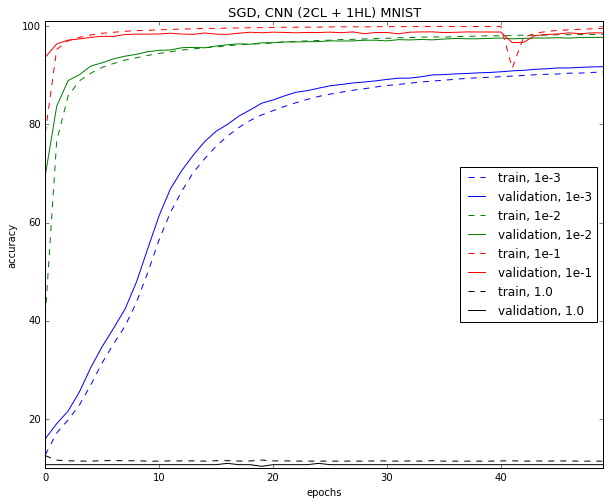

In [71]:
plt.figure(figsize=(10, 8))
plt.plot(sgd1['train_acc'], 'b--')
plt.plot(sgd1['val_acc'], 'b')
plt.plot(sgd2['train_acc'], 'g--')
plt.plot(sgd2['val_acc'], 'g')
plt.plot(sgd3['train_acc'], 'r--')
plt.plot(sgd3['val_acc'], 'r')
plt.plot(sgd4['train_acc'], 'k--')
plt.plot(sgd4['val_acc'], 'k')
plt.ylim(ymax=101)
plt.legend(['train, 1e-3', 'validation, 1e-3', 'train, 1e-2', 'validation, 1e-2',
           'train, 1e-1', 'validation, 1e-1', 'train, 1.0', 'validation, 1.0'], loc=0, fontsize=12)
plt.xlim(xmax=49)
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('SGD, CNN (2CL + 1HL) MNIST', fontsize=13)
plt.savefig("sgd_cnn_rates_mnist.jpg")


In [8]:
%%time
bn_sgd1 = main.run_method(lasagne.updates.sgd, model='cnn', CL=2, HL=1, num_epochs=50, alpha=1e-3, BN=True)

CPU times: user 57.9 s, sys: 3min 6s, total: 4min 3s
Wall time: 4min 9s


In [ ]:
%%time
bn_sgd2 = main.run_method(lasagne.updates.sgd, model='cnn', CL=2, HL=1, num_epochs=50, alpha=1e-2, BN=True)

CPU times: user 57.4 s, sys: 3min 9s, total: 4min 6s
Wall time: 4min 9s


In [ ]:
%%time
bn_sgd3 = main.run_method(lasagne.updates.sgd, model='cnn', CL=2, HL=1, num_epochs=50, alpha=1e-1, BN=True)

In [ ]:
%%time
bn_sgd4 = main.run_method(lasagne.updates.sgd, model='cnn', CL=2, HL=1, num_epochs=50, alpha=1.0, BN=True)

In [ ]:
import pickle
with open('bn_sgd', 'wb') as f:
    pickle.dump(bn_sgd1, f)
    pickle.dump(bn_sgd2, f)
    pickle.dump(bn_sgd3, f)
    pickle.dump(bn_sgd4, f)

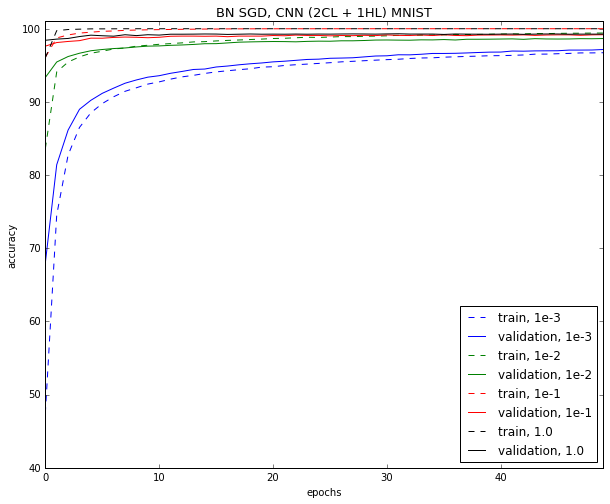

In [73]:
plt.figure(figsize=(10, 8))
plt.plot(bn_sgd1['train_acc'], 'b--')
plt.plot(bn_sgd1['val_acc'], 'b')
plt.plot(bn_sgd2['train_acc'], 'g--')
plt.plot(bn_sgd2['val_acc'], 'g')
plt.plot(bn_sgd3['train_acc'], 'r--')
plt.plot(bn_sgd3['val_acc'], 'r')
plt.plot(bn_sgd4['train_acc'], 'k--')
plt.plot(bn_sgd4['val_acc'], 'k')
plt.ylim(ymax=101)
plt.legend(['train, 1e-3', 'validation, 1e-3', 'train, 1e-2', 'validation, 1e-2',
           'train, 1e-1', 'validation, 1e-1', 'train, 1.0', 'validation, 1.0'], loc=0, fontsize=12)
plt.xlim(xmax=49)
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('BN SGD, CNN (2CL + 1HL) MNIST', fontsize=13)
plt.savefig("bn_sgd_cnn_rates_mnist.jpg")


In [ ]:
%%time
adam1 = main.run_method(lasagne.updates.adam, model='cnn', CL=2, HL=1, num_epochs=50, alpha=1e-4)

In [ ]:
%%time
adam2 = main.run_method(lasagne.updates.adam, model='cnn', CL=2, HL=1, num_epochs=50, alpha=1e-3)

In [ ]:
%%time
adam3 = main.run_method(lasagne.updates.adam, model='cnn', CL=2, HL=1, num_epochs=50, alpha=5e-3)

In [ ]:
import pickle
with open('adam', 'wb') as f:
    pickle.dump(adam1, f)
    pickle.dump(adam2, f)
    pickle.dump(adam3, f)

In [ ]:
%%time
bn_adam1 = main.run_method(lasagne.updates.adam, model='cnn', CL=2, HL=1, num_epochs=50, alpha=1e-4, BN=True)

In [ ]:
%%time
bn_adam2 = main.run_method(lasagne.updates.adam, model='cnn', CL=2, HL=1, num_epochs=50, alpha=1e-3, BN=True)

In [ ]:
%%time
bn_adam3 = main.run_method(lasagne.updates.adam, model='cnn', CL=2, HL=1, num_epochs=50, alpha=5e-3, BN=True)

In [ ]:
%%time
bn_adam4 = main.run_method(lasagne.updates.adam, model='cnn', CL=2, HL=1, num_epochs=50, alpha=1e-2, BN=True)

In [ ]:
import pickle
with open('bn_adam', 'wb') as f:
    pickle.dump(bn_adam1, f)
    pickle.dump(bn_adam2, f)
    pickle.dump(bn_adam3, f)
    pickle.dump(bn_adam4, f)

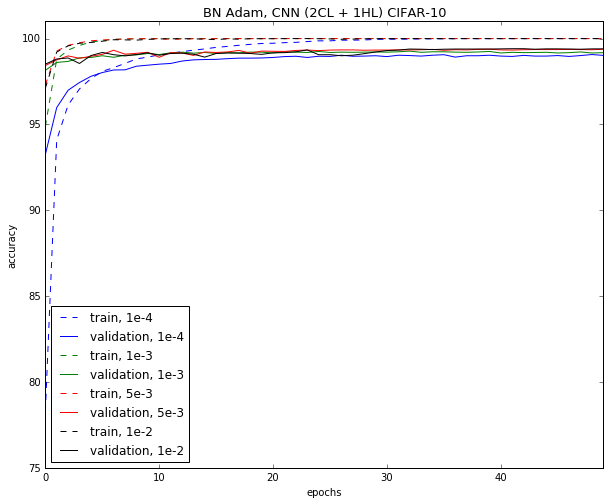

In [62]:
plt.figure(figsize=(10, 8))
plt.plot(bn_adam1['train_acc'], 'b--')
plt.plot(bn_adam1['val_acc'], 'b')
plt.plot(bn_adam2['train_acc'], 'g--')
plt.plot(bn_adam2['val_acc'], 'g')
plt.plot(bn_adam3['train_acc'], 'r--')
plt.plot(bn_adam3['val_acc'], 'r')
plt.plot(bn_adam4['train_acc'], 'k--')
plt.plot(bn_adam4['val_acc'], 'k')
plt.legend(['train, 1e-4', 'validation, 1e-4', 'train, 1e-3', 'validation, 1e-3', 
            'train, 5e-3', 'validation, 5e-3', 'train, 1e-2', 'validation, 1e-2'], loc=0, fontsize=12)
plt.ylim(ymax=101)
plt.xlim(xmax=49)
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('BN Adam, CNN (2CL + 1HL) CIFAR-10', fontsize=13)
# plt.savefig("bn_adam_cnn_rates_cifar10.jpg")



In [ ]:
%%time
bn_adam_eps1 = main.run_method(lasagne.updates.adam, model='cnn', CL=2, HL=1, num_epochs=50, alpha=1e-3, 
                               BN=True, epsilon=1e-4)

In [ ]:
%%time
bn_adam_eps2 = main.run_method(lasagne.updates.adam, model='cnn', CL=2, HL=1, num_epochs=50, alpha=1e-3, 
                               BN=True, epsilon=1e-2)

In [ ]:
import pickle
with open('bn_adam_eps', 'wb') as f:
    pickle.dump(bn_adam_eps1, f)
    pickle.dump(bn_adam_eps2, f)

In [ ]:
%%time
momentum1 = main.run_method(lasagne.updates.momentum, model='cnn', CL=2, HL=1, num_epochs=50, alpha=1e-2)

In [ ]:
%%time
momentum2 = main.run_method(lasagne.updates.momentum, model='cnn', CL=2, HL=1, num_epochs=50, alpha=1e-1)

In [ ]:
%%time
momentum3 = main.run_method(lasagne.updates.momentum, model='cnn', CL=2, HL=1, num_epochs=50, alpha=0.5)

In [ ]:
import pickle
with open('momentum', 'wb') as f:
    pickle.dump(momentum1, f)
    pickle.dump(momentum2, f)
    pickle.dump(momentum3, f)

In [ ]:
%%time
bn_momentum1 = main.run_method(lasagne.updates.momentum, model='cnn', CL=2, HL=1, num_epochs=50, alpha=1e-2, BN=True)

In [ ]:
%%time
bn_momentum2 = main.run_method(lasagne.updates.momentum, model='cnn', CL=2, HL=1, num_epochs=50, alpha=1e-1, BN=True)

In [ ]:
%%time
bn_momentum3 = main.run_method(lasagne.updates.momentum, model='cnn', CL=2, HL=1, num_epochs=50, alpha=1.0, BN=True)

In [ ]:
import pickle
with open('bn_momentum', 'wb') as f:
    pickle.dump(bn_momentum1, f)
    pickle.dump(bn_momentum2, f)
    pickle.dump(bn_momentum3, f)

In [ ]:
%%time
adagrad1 = main.run_method(lasagne.updates.adagrad, model='cnn', CL=2, HL=1, num_epochs=50, alpha=1e-3)

In [ ]:
%%time
adagrad2 = main.run_method(lasagne.updates.adagrad, model='cnn', CL=2, HL=1, num_epochs=50, alpha=1e-2)

In [ ]:
%%time
adagrad3 = main.run_method(lasagne.updates.adagrad, model='cnn', CL=2, HL=1, num_epochs=50, alpha=1e-1)

In [ ]:
import pickle
with open('adagrad', 'wb') as f:
    pickle.dump(adagrad1, f)
    pickle.dump(adagrad2, f)
    pickle.dump(adagrad3, f)

In [ ]:
%%time
bn_adagrad1 = main.run_method(lasagne.updates.adagrad, model='cnn', CL=2, HL=1, num_epochs=50, alpha=1e-3, BN=True)

In [ ]:
%%time
bn_adagrad2 = main.run_method(lasagne.updates.adagrad, model='cnn', CL=2, HL=1, num_epochs=50, alpha=1e-2, BN=True)

In [ ]:
%%time
bn_adagrad3 = main.run_method(lasagne.updates.adagrad, model='cnn', CL=2, HL=1, num_epochs=50, alpha=1e-1, BN=True)

In [ ]:
%%time
bn_adagrad4 = main.run_method(lasagne.updates.adagrad, model='cnn', CL=2, HL=1, num_epochs=50, alpha=1.0, BN=True)

In [ ]:
import pickle
with open('bn_adagrad', 'wb') as f:
    pickle.dump(bn_adagrad1, f)
    pickle.dump(bn_adagrad2, f)
    pickle.dump(bn_adagrad3, f)
    pickle.dump(bn_adagrad4, f)

In [ ]:
%%time
adadelta1 = main.run_method(lasagne.updates.adadelta, model='cnn', CL=2, HL=1, num_epochs=50, alpha=1e-1)

In [ ]:
%%time
adadelta2 = main.run_method(lasagne.updates.adadelta, model='cnn', CL=2, HL=1, num_epochs=50, alpha=1.0)

In [ ]:
%%time
adadelta3 = main.run_method(lasagne.updates.adadelta, model='cnn', CL=2, HL=1, num_epochs=50, alpha=5.0)

In [ ]:
import pickle
with open('adadelta', 'wb') as f:
    pickle.dump(adadelta1, f)
    pickle.dump(adadelta2, f)
    pickle.dump(adadelta3, f)

In [ ]:
%%time
bn_adadelta1 = main.run_method(lasagne.updates.adadelta, model='cnn', CL=2, HL=1, num_epochs=50, alpha=1e-1, BN=True)

In [ ]:
%%time
bn_adadelta2 = main.run_method(lasagne.updates.adadelta, model='cnn', CL=2, HL=1, num_epochs=50, alpha=1.0, BN=True)

In [ ]:
%%time
bn_adadelta3 = main.run_method(lasagne.updates.adadelta, model='cnn', CL=2, HL=1, num_epochs=50, alpha=5.0, BN=True)

In [ ]:
import pickle
with open('bn_adadelta', 'wb') as f:
    pickle.dump(bn_adadelta1, f)
    pickle.dump(bn_adadelta2, f)
    pickle.dump(bn_adadelta3, f)

In [ ]:
%%time
rmsprop1 = main.run_method(lasagne.updates.rmsprop, model='cnn', CL=2, HL=1, num_epochs=50, alpha=1e-3)

In [ ]:
%%time
rmsprop2 = main.run_method(lasagne.updates.rmsprop, model='cnn', CL=2, HL=1, num_epochs=50, alpha=1e-2)

In [ ]:
%%time
rmsprop3 = main.run_method(lasagne.updates.rmsprop, model='cnn', CL=2, HL=1, num_epochs=50, alpha=5e-2)

In [ ]:
import pickle
with open('rmsprop', 'wb') as f:
    pickle.dump(rmsprop1, f)
    pickle.dump(rmsprop2, f)
    pickle.dump(rmsprop3, f)

In [ ]:
%%time
bn_rmsprop1 = main.run_method(lasagne.updates.rmsprop, model='cnn', CL=2, HL=1, num_epochs=50, alpha=1e-3, BN=True)

In [ ]:
%%time
bn_rmsprop2 = main.run_method(lasagne.updates.rmsprop, model='cnn', CL=2, HL=1, num_epochs=50, alpha=1e-2, BN=True)

In [ ]:
%%time
bn_rmsprop3 = main.run_method(lasagne.updates.rmsprop, model='cnn', CL=2, HL=1, num_epochs=50, alpha=1e-1, BN=True)

In [ ]:
import pickle
with open('bn_rmsprop', 'wb') as f:
    pickle.dump(bn_rmsprop1, f)
    pickle.dump(bn_rmsprop2, f)
    pickle.dump(bn_rmsprop3, f)